# Cerebral Stroke Prediction-Imbalanced Dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# READ THE DATA
df = pd.read_csv('cerebral stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# checking the shape
df.shape

(43400, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


as a data science intern i can analyize without and EDA ,only with descibe fn. there are not any outliers in this data set.but bmi has some null data


In [6]:
# checking the data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
# checking columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#Checking for messing values
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

as we can see that 2 columns have null values.


In [9]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [10]:
#Checking for missing values
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
# dropping unimportant column

df = df.drop(columns = [
    'id'
       ])

df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# UNIVIRATE ANALYSIS

In [12]:
#cheking  the value count
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

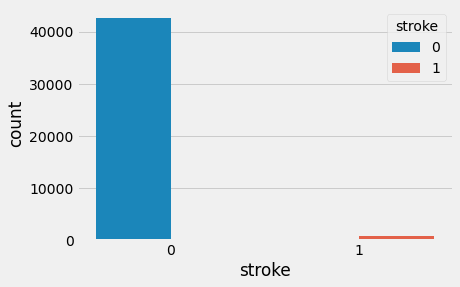

In [13]:
#plot value counts
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='stroke', data=df, hue='stroke')

The data is imbalanced because label 1 has only 783 records while label 0 has 42617 records. 

So making predictions using this data is not reliable.

One Hot Encoding

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
df.count()

gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

In [16]:
df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [17]:
#dropping nulls
df = df.dropna()

In [18]:
df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [19]:
#cheking  the value count
df['stroke'].value_counts()

0    41295
1      643
Name: stroke, dtype: int64

# BIVIRATE ANALYSIS

<AxesSubplot:xlabel='stroke', ylabel='age'>

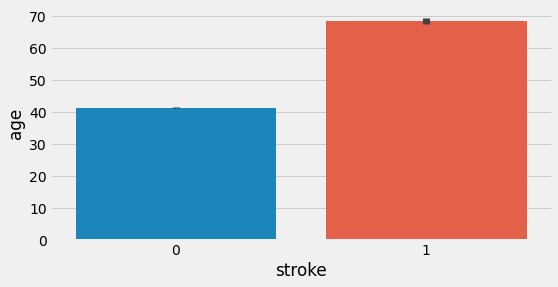

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='stroke',y='age',data=df)

as above analysis we can see that age is a big factor.

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

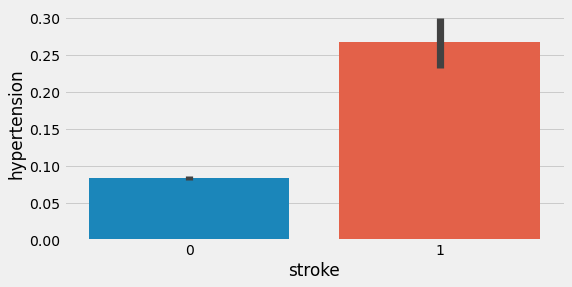

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x='stroke',y='hypertension',data=df)

as above analysis hypertension has some  role .

<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>

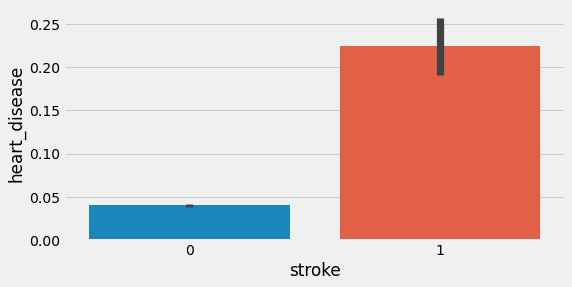

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(x='stroke',y='heart_disease',data=df)

as above analysis heart dieses has some  role .

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

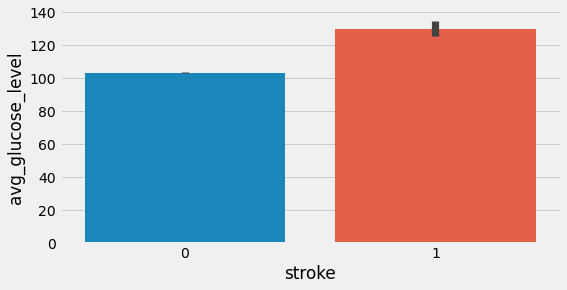

In [23]:
plt.figure(figsize=(8,4))
sns.barplot(x='stroke',y='avg_glucose_level',data=df)

as above analysis glucos level has not major role .

In [24]:
#Devide dataset into features and labe
y= df['stroke']
x =df.drop(['stroke'], axis=1)
# standard scaler
scaler=StandardScaler()
x_scaler =scaler.fit_transform (x)
#Data split into train test
x_train, x_test, y_train, y_test = train_test_split (x_scaler, y, test_size=0.3, random_state=42)


In [25]:
#Model confidence/accuracy

#write one function and call as many as times to check accuracy_score of different models 
def metric_score(clf, x_train, x_test,y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n================Train Result======")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
     
    elif train==False:
        pred = clf.predict(x_test)
        print("\n================TEST Result======")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%") 
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [26]:
#Initiate LogisticRegression
lgt_clf= LogisticRegression ()
#Train the model
lgt_clf.fit(x_train,y_train)
# call the fn. and pass dataset to chek train and test score
metric_score(lgt_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(lgt_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 98.43%

================TEST Result======
Accuracy Score: 98.56%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12401
           1       0.00      0.00      0.00       181

    accuracy                           0.99     12582
   macro avg       0.49      0.50      0.50     12582
weighted avg       0.97      0.99      0.98     12582



C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#Initiate decision tree classifier
dt_clf= DecisionTreeClassifier ()
#Train the model
dt_clf.fit(x_train,y_train)
# call the fn. and pass dataset to chek train and test score
metric_score(dt_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(dt_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 96.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     12401
           1       0.04      0.05      0.04       181

    accuracy                           0.97     12582
   macro avg       0.51      0.52      0.51     12582
weighted avg       0.97      0.97      0.97     12582



In [28]:
#Initiate RandomForestClassifier
rd_clf= RandomForestClassifier ()
#Train the model
rd_clf.fit(x_train,y_train)
# call the fn. and pass dataset to chek train and test score
metric_score(rd_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(rd_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 99.99%

================TEST Result======
Accuracy Score: 98.55%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12401
           1       0.00      0.00      0.00       181

    accuracy                           0.99     12582
   macro avg       0.49      0.50      0.50     12582
weighted avg       0.97      0.99      0.98     12582



In [29]:

#Initiate GradientBoostingClassifier
grd_clf= GradientBoostingClassifier ()
#Train the model
grd_clf.fit(x_train,y_train)
# call the fn. and pass dataset to chek train and test score
metric_score(grd_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(grd_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 98.50%

================TEST Result======
Accuracy Score: 98.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12401
           1       0.00      0.00      0.00       181

    accuracy                           0.98     12582
   macro avg       0.49      0.50      0.50     12582
weighted avg       0.97      0.98      0.98     12582



all of above model i can analyize random forest is good to prepare the model

# RandomUnderSampler

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
x.shape

(41938, 20)

In [32]:
x.count()

age                               41938
hypertension                      41938
heart_disease                     41938
avg_glucose_level                 41938
bmi                               41938
gender_Female                     41938
gender_Male                       41938
gender_Other                      41938
ever_married_No                   41938
ever_married_Yes                  41938
work_type_Govt_job                41938
work_type_Never_worked            41938
work_type_Private                 41938
work_type_Self-employed           41938
work_type_children                41938
Residence_type_Rural              41938
Residence_type_Urban              41938
smoking_status_formerly smoked    41938
smoking_status_never smoked       41938
smoking_status_smokes             41938
dtype: int64

In [33]:
rus = RandomUnderSampler()
x, y = rus.fit_resample(x, y)

In [34]:
x.shape

(1286, 20)

In [35]:
x.count()

age                               1286
hypertension                      1286
heart_disease                     1286
avg_glucose_level                 1286
bmi                               1286
gender_Female                     1286
gender_Male                       1286
gender_Other                      1286
ever_married_No                   1286
ever_married_Yes                  1286
work_type_Govt_job                1286
work_type_Never_worked            1286
work_type_Private                 1286
work_type_Self-employed           1286
work_type_children                1286
Residence_type_Rural              1286
Residence_type_Urban              1286
smoking_status_formerly smoked    1286
smoking_status_never smoked       1286
smoking_status_smokes             1286
dtype: int64

In [36]:
#Initiate RandomForestClassifier
rd_clf= RandomForestClassifier ()
#Train the model
rd_clf.fit(x_train,y_train)
# call the fn. and pass dataset to chek train and test score
metric_score(rd_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(rd_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 98.55%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12401
           1       0.00      0.00      0.00       181

    accuracy                           0.99     12582
   macro avg       0.49      0.50      0.50     12582
weighted avg       0.97      0.99      0.98     12582



# by above models prediction ranom forest is best model to predict the lable.